This Jupyther Notebook is prepaired by name

# Load Data and Perform Basic EDA

### I - Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string

In [2]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -2] Name or service not known>
[nltk_data] Error loading punkt: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [3]:
stemmer = LancasterStemmer()
stopwordList = stopwords.words('english')

In [4]:


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

### II - Read tho File, Create List, and Show First 10 Items

In [5]:
texts = [line.rstrip() for line in open('news.csv')]
for text in texts[1:11]:
	print(text + '\n')

As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

### III - Show How the Data is Sepereated, and Load Data into DataFrame

In [6]:
data = pd.read_csv('news.csv', sep = '\t')
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### IV - Check for Null Values and Remove any Colums with Null Values

In [7]:
data.isnull().sum().sort_values(ascending = False)

title      0
text       0
subject    0
date       0
target     0
dtype: int64

no null values to remove

### V - Generate Counterplot to Show Number of News in Each Subject

<AxesSubplot:xlabel='subject', ylabel='count'>

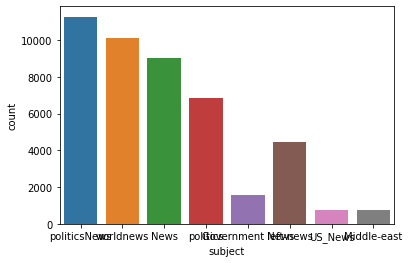

In [8]:
sns.countplot(x = 'subject', data = data)

### VI - Generate Counterplot to Show Number of News in Each Category

<AxesSubplot:xlabel='target', ylabel='count'>

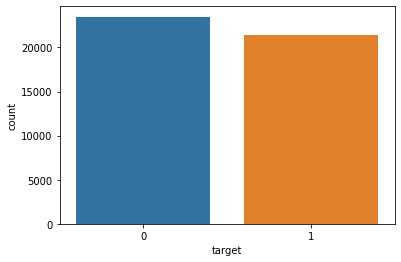

In [9]:
sns.countplot(x = 'target', data = data)

### VII - Generate 2 Word Clouds , Write the Most Common Words in Each Category


In [10]:
data0 = data[data['target'] == 0]
data1 = data[data['target'] == 1]

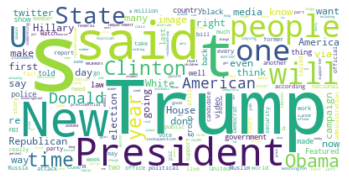

In [11]:
text = " ".join(cat for cat in data0.text)
#text2 = " ".join(title for title in df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

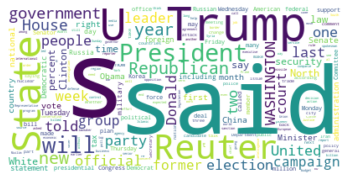

In [12]:
text = " ".join(cat for cat in data1.text)
#text2 = " ".join(title for title in df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### VIII - Create "AllText" Column that contains the Concatenation of 'subject' , 'title' , 'text'

In [13]:
cols = ['subject', 'title', 'text']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

### IX - Copy DataFrame to a New DataFrame

In [14]:
cData = data.copy()

### X - Drop the Columns Used to Create 'AllText'

In [15]:
data = data.drop(cols, axis = 1)

### XI - Calculate Length of 'AllText' and put it in a New Column 'length'

In [16]:
data['length'] = data['AllText'].str.len()


### XII - Plot a Histrogram for Each Category

In [17]:
data0 = data[data['target'] == 0]
data1 = data[data['target'] == 1]

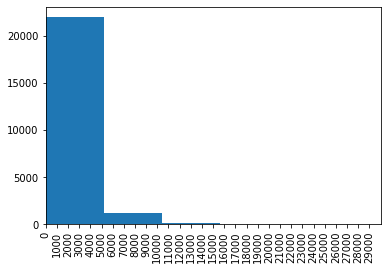

In [18]:
plt.hist(data0['length'])
plt.xlim([0,30000])
plt.xticks(np.arange(0, 30000, 1000.0), rotation = 90)
plt.show()

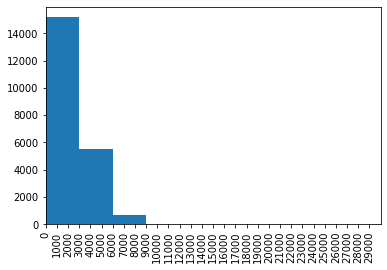

In [19]:
plt.hist(data1['length'])
plt.xlim([0,30000])
plt.xticks(np.arange(0, 30000, 1000.0), rotation = 90)
plt.show()

### XIII - What is TFIDF, How do you use SKLearn to create a Bag of Words, and how do you generate TFIDF for the Bag of Words?

TFIDF is a way of adjusting the frequency weigh in a bag of words to boost the frequency of words deemed important

# 2 - Train Test Split

### I - Import Related Libraries and Perform Split With 20% in Test

In [20]:
data.head()

,date,target,AllText,length
0,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub...",4737
1,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...,4155
2,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...,2863
3,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...,2534
4,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...,5287


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [22]:
text_train, text_test, label_train, label_test = train_test_split(data['AllText'], data['target'], test_size=0.2)

In [23]:
label_test.head()

21829    0
30842    0
3157     1
14753    1
39092    0
Name: target, dtype: int64

### II - Use Count Plot to Show Distribution of Real Vs. Fake News are in each Train and Test

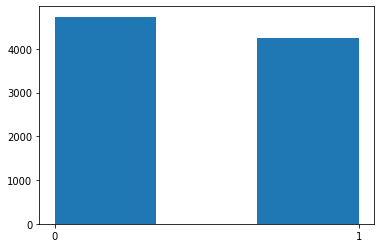

In [24]:
plt.hist(label_test, bins=3)
plt.xticks([0,1])
plt.show()

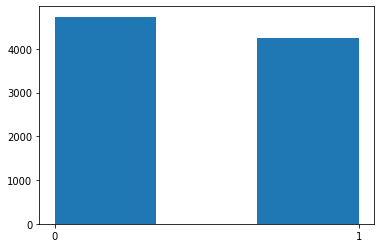

In [25]:
plt.hist(label_test, bins=3)
plt.xticks([0,1])
plt.show()

# 3 - Training and Testing Classifier Useing MultinominalNB

In [26]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer

### I - Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### II - Fit the Pipeline and Perform Prediction

In [28]:
pipeline.fit(text_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f1162e49c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [29]:
predict = pipeline.predict(text_test)

### III - Generate Classification Report and Cofusion Matrix

In [30]:
classification_report(label_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      4734\n           1       0.95      0.95      0.95      4246\n\n    accuracy                           0.96      8980\n   macro avg       0.96      0.96      0.96      8980\nweighted avg       0.96      0.96      0.96      8980\n'

In [31]:
confusion_matrix(label_test, predict)

array([[4540,  194],
       [ 203, 4043]])

### IV - Discuss Performance

The model has an very good accuracy of around 96%
it does seem to be better at predicting real news over fake news

### V - Copy News From a Website and use the Model to Predict it

In [32]:
newData = 'politicsNews_Disney World Fortifies Borders With Armed Characters As Park Announces Plan To Secede From Florida_ORLANDO, FL—Announcing that the 25,000-acre resort was now officially a part of the independent and sovereign Reedy Creek Improvement Republic, Disney World was reportedly fortifying its borders with armed characters Monday as the theme park shared its plan to secede from Florida. “Florida can try to dissolve our government all they want, but I assure you, we’re not going anywhere,” said a cast member dressed as Mickey Mouse, who hoisted a Walt Disney World Flag high above Cinderella’s castle as Queen Elsa placed a bandolier around her chest, and Captain Jack Sparrow helped Chip ‘n’ Dale board up and barricade Main Street, U.S.A. in preparation for the long siege ahead. “You’ve left us no other choice, Governor DeSantis. You can take this Magical Kingdom from our cold, dead bodies. We will find glory in death, and as we venture onward to Valhalla, we will revel in the flames of battle knowing we have fought for the freedom of the happiest place on earth.” At press time, over 10,000 reinforcements from Anaheim were en route to the Florida park.'
# this is fake news from theonion.com

In [33]:
pipeline.predict([newData])

array([0])

this was accuratly predicted as fake news

# 4 - Training and Testing a Deep Nural Network

### I - Import Related Libraries

In [34]:
from sklearn.neural_network import MLPClassifier

### II - Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2

In [35]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2, max_iter=50)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

### III - Fit the Pipeline and Predict

In [36]:
pipeline.fit(text_train, label_train)

Iteration 1, loss = 0.29384556
Validation score: 0.991370
Iteration 2, loss = 0.03451083
Validation score: 0.995546
Iteration 3, loss = 0.01017309
Validation score: 0.996102
Iteration 4, loss = 0.00515307
Validation score: 0.996102
Iteration 5, loss = 0.00333440
Validation score: 0.995546
Iteration 6, loss = 0.00247988
Validation score: 0.995546
Iteration 7, loss = 0.00207307
Validation score: 0.995546
Iteration 8, loss = 0.00181472
Validation score: 0.995546
Iteration 9, loss = 0.00163148
Validation score: 0.995546
Iteration 10, loss = 0.00149012
Validation score: 0.995546
Iteration 11, loss = 0.00137568
Validation score: 0.995546
Iteration 12, loss = 0.00127843
Validation score: 0.995824
Iteration 13, loss = 0.00119415
Validation score: 0.995824
Iteration 14, loss = 0.00111925
Validation score: 0.996102
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f1162e49c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               max_iter=50, random_state=0, verbose=2))])

In [37]:
predict = pipeline.predict(text_test)

### IV - Generate Classification Report and Confusion Matrix

In [38]:
classification_report(label_test, predict)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      4734\n           1       0.99      1.00      0.99      4246\n\n    accuracy                           0.99      8980\n   macro avg       0.99      1.00      0.99      8980\nweighted avg       0.99      0.99      0.99      8980\n'

In [39]:
confusion_matrix(label_test, predict)

array([[4706,   28],
       [  17, 4229]])

### V - Discus Performance

The model has an almost perfect accuracy
it does seem to be better at predicting fake news over real news

### VI - Use the Same News From 3V and Run it Through This Model

In [40]:
pipeline.predict([newData])

array([0])

this was accuratly predictied as fake news

### VII - Discuss Performance Diffecences Between this and NB Models

The model took considerable longer to train than the NB model, however, it have much better accuracy when it comes to classifiying new data.

# 5 - Extra Credit


In [41]:
target = cData['subject']
cData = cData.drop(['subject', 'AllText'], axis = 1)
cols = ['title', 'text']
cData['AllText'] = cData[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
cData = cData.drop(cols, axis = 1)


In [42]:
ctext_train, ctext_test, clabel_train, clabel_test = train_test_split(cData['AllText'], target, test_size=0.2)

In [75]:
cpipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,50), random_state=0, early_stopping=True, verbose=2, max_iter = 50, activation='relu', solver='lbfgs')),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [76]:
cpipeline.fit(ctext_train, clabel_train)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     17997658     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09569D+00    |proj g|=  1.38949D-01

At iterate    1    f=  1.82194D+00    |proj g|=  4.49171D-02

At iterate    2    f=  1.79004D+00    |proj g|=  3.05059D-02

At iterate    3    f=  1.77449D+00    |proj g|=  1.38607D-02

At iterate    4    f=  1.77003D+00    |proj g|=  9.87100D-03

At iterate    5    f=  1.75734D+00    |proj g|=  2.72810D-02

At iterate    6    f=  1.68615D+00    |proj g|=  9.61442D-02

At iterate    7    f=  1.63513D+00    |proj g|=  1.39238D-01

At iterate    8    f=  1.46958D+00    |proj g|=  1.78277D-01

At iterate    9    f=  1.29675D+00    |proj g|=  1.25346D-01

At iterate   10    f=  1.17846D+00    |proj g|=  1.89861D-01

At iterate   11    f=  1.04521D+00    |proj g|=  6.63906D-02

At iterate   12    f=  9.85721D-01    |proj g|=  1.01726D-01

At iterate   13    f=  9.4

/home/name/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f1162e49c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50), max_iter=50,
                               random_state=0, solver='lbfgs', verbose=2))])

In [78]:
cpredict = cpipeline.predict(ctext_test)

In [79]:
cpredict

array(['worldnews', 'worldnews', 'politicsNews', ..., 'worldnews',
       'worldnews', 'politics'], dtype='<U15')

In [80]:
classification_report(clabel_test, cpredict)

/home/name/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/name/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/name/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                 precision    recall  f1-score   support\n\nGovernment News       0.13      0.02      0.04       328\n    Middle-east       0.00      0.00      0.00       151\n           News       0.91      0.95      0.93      1763\n        US_News       0.44      0.70      0.54       151\n      left-news       0.32      0.23      0.27       885\n       politics       0.52      0.69      0.59      1392\n   politicsNews       0.97      0.98      0.98      2297\n      worldnews       0.97      0.98      0.97      2013\n\n       accuracy                           0.80      8980\n      macro avg       0.53      0.57      0.54      8980\n   weighted avg       0.77      0.80      0.78      8980\n'

In [82]:
confusion_matrix(clabel_test, cpredict)

array([[   8,    0,   18,    4,   68,  213,    6,   11],
       [  11,    0,   10,  111,   10,    0,    2,    7],
       [   1,    0, 1667,    6,   36,   51,    0,    2],
       [  16,    0,   10,  106,    7,    0,    2,   10],
       [  12,    0,   49,    4,  206,  600,    6,    8],
       [  11,    0,   74,    6,  309,  963,   19,   10],
       [   0,    0,    0,    1,    0,   30, 2250,   16],
       [   1,    0,    1,    3,    1,   11,   28, 1968]])